# M5 Forecasting - Accuracy

Explora y visualiza distintos insights utilizando el dataset:

M5 Forecasting - Accuracy | Kaggle

https://www.kaggle.com/c/m5-forecasting-accuracy/data

Nota: No esperamos que hagas forecasting con el dataset, puedes utilizar la herramienta que tu prefieras (Power BI, Tableau, Excel, Python, etc)

Esta entrevista se lleva a cabo de manera presencial en nuestras oficinas. Te pedimos llegar con 15 minutos de anticipación y tener una identificación oficial (INE ó Pasaporte) para autorizar el acceso.

## Setup

Libraries used for the project

In [1]:
import pandas as pd
import os
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import gc
gc.collect

<function gc.collect(generation=2)>

## Reading dataset

Sourse (https://www.kaggle.com/competitions/m5-forecasting-accuracy/data)

Files information provided by sourse and visualization:
1. calendar.csv
- Contains information about the dates on which the products are sold
- Temporary information about events and promotions
- Period: 01/29/2011-06/19/2016
2. sell_prices.csv
- Contains information about the price of the products sold per store and date.
- Record of how the price of each product (3049) have evolved over time within each of the branches(10).
3. sales_train_evaluation.csv
- Includes sales [d_1 - d_1941] (labels used for the Public leaderboard)



In [2]:
#Modificar ruta de lectura
os.chdir('D:\FANNY\DOCUMENTOS\ANALISIS DE DATOS\Ventagium\m5-forecasting-accuracy')
#Lectura de archivos
calendar = pd.read_csv('calendar.csv')
evaluation = pd.read_csv('sales_train_evaluation.csv')
prices = pd.read_csv('sell_prices.csv')

## Dataset Overview and Cleaning

In [3]:
#Columns 'event_name_2' and 'event_type_2' will be removed due to their low representation and limited impact on the analysis.
calendar = calendar.drop(['event_name_2', 'event_type_2'], axis=1)
calendar = calendar.rename(columns={"event_name_1": "event_name", "event_type_1": "event_type"})
calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name,event_type,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,0,0,0


In [4]:
prices

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [5]:
# Columns 'id' and 'dept_id' will be removed do to lack of meaningful information
evaluation = evaluation.drop(['id', 'dept_id'], axis=1)
evaluation.head()

,item_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


### Null values

In [6]:
print(f'There are {calendar.isna().sum().sum()} null values in the calendar dataset')
print(f'There are {prices.isna().sum().sum()} null values in the prices dataset')
print(f'There are {evaluation.isna().sum().sum()} null values in the evaluation dataset')

There are 3614 null values in the calendar dataset
There are 0 null values in the prices dataset
There are 0 null values in the evaluation dataset


### Duplicated values

In [7]:
print(f'There are {calendar.duplicated().sum()} duplicated values in the calendar dataset')
print(f'There are {prices.duplicated().sum()} duplicated values in the prices dataset')
print(f'There are {evaluation.duplicated().sum()} duplicated values in the evaluation dataset')

There are 0 duplicated values in the calendar dataset
There are 0 duplicated values in the prices dataset
There are 0 duplicated values in the evaluation dataset


In [8]:
#Prices tabe contains products that have never change their price so there's no use on keeping a weekly update
prices.groupby(['item_id', 'store_id']).filter(lambda x: x['sell_price'].nunique() == 1)

,store_id,item_id,wm_yr_wk,sell_price
154,CA_1,HOBBIES_1_002,11121,3.97
155,CA_1,HOBBIES_1_002,11122,3.97
156,CA_1,HOBBIES_1_002,11123,3.97
157,CA_1,HOBBIES_1_002,11124,3.97
158,CA_1,HOBBIES_1_002,11125,3.97
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [9]:
#Here we can see how many of the products have kept the same price since the beggining (8247)
prices.groupby(['item_id', 'store_id']).filter(lambda x: x['sell_price'].nunique() == 1).drop_duplicates(subset=['item_id','store_id','sell_price'])


,store_id,item_id,wm_yr_wk,sell_price
154,CA_1,HOBBIES_1_002,11121,3.97
416,CA_1,HOBBIES_1_003,11401,2.97
2358,CA_1,HOBBIES_1_011,11213,3.48
2858,CA_1,HOBBIES_1_013,11216,1.97
4134,CA_1,HOBBIES_1_018,11207,11.88
...,...,...,...,...
6838079,WI_3,FOODS_3_815,11250,2.48
6838775,WI_3,FOODS_3_818,11215,2.98
6839555,WI_3,FOODS_3_821,11310,4.98
6840852,WI_3,FOODS_3_826,11331,1.28


In [10]:
# We'll only keep one row representing the ones mentioned above

# Storaging constant price products
constant_price_products = prices.groupby(['item_id', 'store_id'])['sell_price'].nunique()
constant_price_products = constant_price_products[constant_price_products == 1].index
# Filtering for constant price products
constant_price_df = prices.set_index(['item_id', 'store_id']).loc[constant_price_products].reset_index()

# Keeping only the first row for each constant price product
constant_price_df = constant_price_df.drop_duplicates(subset=['item_id', 'store_id'], keep='first')

# Combine with products that have price changes
prices = pd.concat([constant_price_df, prices[~prices.set_index(['item_id', 'store_id']).index.isin(constant_price_products)]]).reset_index(drop=True)
prices

,item_id,store_id,wm_yr_wk,sell_price
0,FOODS_1_014,CA_1,11317,0.98
1,FOODS_1_014,CA_2,11317,0.98
2,FOODS_1_014,CA_3,11317,0.98
3,FOODS_1_014,CA_4,11406,0.98
4,FOODS_1_014,TX_1,11224,0.98
...,...,...,...,...
5353530,FOODS_3_825,WI_3,11617,3.98
5353531,FOODS_3_825,WI_3,11618,3.98
5353532,FOODS_3_825,WI_3,11619,3.98
5353533,FOODS_3_825,WI_3,11620,3.98


In [11]:
#Verifying that there are less than the 1495833 initial products that had constant prices, there should be only 8247 now
prices.groupby(['item_id', 'store_id']).filter(lambda x: x['sell_price'].nunique() == 1)

,item_id,store_id,wm_yr_wk,sell_price
0,FOODS_1_014,CA_1,11317,0.98
1,FOODS_1_014,CA_2,11317,0.98
2,FOODS_1_014,CA_3,11317,0.98
3,FOODS_1_014,CA_4,11406,0.98
4,FOODS_1_014,TX_1,11224,0.98
...,...,...,...,...
8242,HOUSEHOLD_2_516,CA_4,11103,5.94
8243,HOUSEHOLD_2_516,TX_1,11103,5.94
8244,HOUSEHOLD_2_516,WI_1,11101,5.94
8245,HOUSEHOLD_2_516,WI_2,11106,5.94


### Ensure consistent data types

In [12]:
for col in ['event_name', 'event_type','snap_CA','snap_TX','snap_WI']:
    calendar[col] = calendar[col].astype('category')
calendar['date'] = pd.to_datetime(calendar['date'])
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1969 non-null   datetime64[ns]
 1   wm_yr_wk    1969 non-null   int64         
 2   weekday     1969 non-null   object        
 3   wday        1969 non-null   int64         
 4   month       1969 non-null   int64         
 5   year        1969 non-null   int64         
 6   d           1969 non-null   object        
 7   event_name  162 non-null    category      
 8   event_type  162 non-null    category      
 9   snap_CA     1969 non-null   category      
 10  snap_TX     1969 non-null   category      
 11  snap_WI     1969 non-null   category      
dtypes: category(5), datetime64[ns](1), int64(4), object(2)
memory usage: 119.3+ KB


In [13]:
for col in ['store_id', 'item_id']:
    prices[col] = prices[col].astype('category')
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353535 entries, 0 to 5353534
Data columns (total 4 columns):
 #   Column      Dtype   
---  ------      -----   
 0   item_id     category
 1   store_id    category
 2   wm_yr_wk    int64   
 3   sell_price  float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 97.1 MB


In [14]:
for col in ['item_id', 'cat_id', 'store_id', 'state_id']:
    evaluation[col] = evaluation[col].astype('category')
evaluation.head()

,item_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


### Transformation

In [15]:
# Transposing sales data to have dates as a column
evaluation = pd.melt(evaluation,
                     id_vars=['item_id', 'cat_id', 'store_id', 'state_id'],
                     var_name='d',
                     value_name='sales')
# Dropping rows that contain zero sales and reset the index
evaluation = evaluation.loc[evaluation['sales'] != 0].reset_index(drop=True)
evaluation.head()

,item_id,cat_id,store_id,state_id,d,sales
0,HOBBIES_1_008,HOBBIES,CA_1,CA,d_1,12
1,HOBBIES_1_009,HOBBIES,CA_1,CA,d_1,2
2,HOBBIES_1_015,HOBBIES,CA_1,CA,d_1,4
3,HOBBIES_1_016,HOBBIES,CA_1,CA,d_1,5
4,HOBBIES_1_022,HOBBIES,CA_1,CA,d_1,2


### Cross-tabulation

In [16]:
# Merging with calendar to get date information of sales 
evaluation_calendar = evaluation.merge(calendar[['d', 'date','wm_yr_wk','event_name','event_type','snap_CA','snap_TX','snap_WI']], on=['d'], how='left')
evaluation_calendar['date'] = pd.to_datetime(evaluation_calendar['date'])

evaluation_calendar.head()

,item_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,event_name,event_type,snap_CA,snap_TX,snap_WI
0,HOBBIES_1_008,HOBBIES,CA_1,CA,d_1,12,2011-01-29,11101,NaN,NaN,0,0,0
1,HOBBIES_1_009,HOBBIES,CA_1,CA,d_1,2,2011-01-29,11101,NaN,NaN,0,0,0
2,HOBBIES_1_015,HOBBIES,CA_1,CA,d_1,4,2011-01-29,11101,NaN,NaN,0,0,0
3,HOBBIES_1_016,HOBBIES,CA_1,CA,d_1,5,2011-01-29,11101,NaN,NaN,0,0,0
4,HOBBIES_1_022,HOBBIES,CA_1,CA,d_1,2,2011-01-29,11101,NaN,NaN,0,0,0


In [17]:
#Creating a structure that contains prices and sales
# Merge the dataframes on 'item_id', 'store_id', and 'wm_yr_wk'
sales = pd.merge(evaluation_calendar, prices, on=['item_id', 'store_id', 'wm_yr_wk'], how='left')

# Display the first few rows to verify the merge
sales.head()

,item_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,event_name,event_type,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_008,HOBBIES,CA_1,CA,d_1,12,2011-01-29,11101,NaN,NaN,0,0,0,0.46
1,HOBBIES_1_009,HOBBIES,CA_1,CA,d_1,2,2011-01-29,11101,NaN,NaN,0,0,0,1.56
2,HOBBIES_1_015,HOBBIES,CA_1,CA,d_1,4,2011-01-29,11101,NaN,NaN,0,0,0,0.70
3,HOBBIES_1_016,HOBBIES,CA_1,CA,d_1,5,2011-01-29,11101,NaN,NaN,0,0,0,0.70
4,HOBBIES_1_022,HOBBIES,CA_1,CA,d_1,2,2011-01-29,11101,NaN,NaN,0,0,0,6.86


In [18]:
# Creating a new column for sales messured in USD by multiplying sales quantity by sell_price
sales['salesUSD'] = sales['sales'] * sales['sell_price']
sales.head()

,item_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,event_name,event_type,snap_CA,snap_TX,snap_WI,sell_price,salesUSD
0,HOBBIES_1_008,HOBBIES,CA_1,CA,d_1,12,2011-01-29,11101,NaN,NaN,0,0,0,0.46,5.52
1,HOBBIES_1_009,HOBBIES,CA_1,CA,d_1,2,2011-01-29,11101,NaN,NaN,0,0,0,1.56,3.12
2,HOBBIES_1_015,HOBBIES,CA_1,CA,d_1,4,2011-01-29,11101,NaN,NaN,0,0,0,0.70,2.80
3,HOBBIES_1_016,HOBBIES,CA_1,CA,d_1,5,2011-01-29,11101,NaN,NaN,0,0,0,0.70,3.50
4,HOBBIES_1_022,HOBBIES,CA_1,CA,d_1,2,2011-01-29,11101,NaN,NaN,0,0,0,6.86,13.72


In [19]:
sales.loc[:, ['item_id', 'cat_id', 'store_id' , 'state_id' , 'd' , 'date' , 'wm_yr_wk', 'sales','sell_price', 'salesUSD', 'event_name', 'event_type', 'snap_CA', 'snap_TX','snap_WI']]  # 'Maths Score', 'Name', 'Sr.no'

,item_id,cat_id,store_id,state_id,d,date,wm_yr_wk,sales,sell_price,salesUSD,event_name,event_type,snap_CA,snap_TX,snap_WI
0,HOBBIES_1_008,HOBBIES,CA_1,CA,d_1,2011-01-29,11101,12,0.46,5.52,NaN,NaN,0,0,0
1,HOBBIES_1_009,HOBBIES,CA_1,CA,d_1,2011-01-29,11101,2,1.56,3.12,NaN,NaN,0,0,0
2,HOBBIES_1_015,HOBBIES,CA_1,CA,d_1,2011-01-29,11101,4,0.70,2.80,NaN,NaN,0,0,0
3,HOBBIES_1_016,HOBBIES,CA_1,CA,d_1,2011-01-29,11101,5,0.70,3.50,NaN,NaN,0,0,0
4,HOBBIES_1_022,HOBBIES,CA_1,CA,d_1,2011-01-29,11101,2,6.86,13.72,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939266,FOODS_3_821,FOODS,WI_3,WI,d_1941,2016-05-22,11617,4,NaN,NaN,NaN,NaN,0,0,0
18939267,FOODS_3_822,FOODS,WI_3,WI,d_1941,2016-05-22,11617,4,3.98,15.92,NaN,NaN,0,0,0
18939268,FOODS_3_823,FOODS,WI_3,WI,d_1941,2016-05-22,11617,1,2.98,2.98,NaN,NaN,0,0,0
18939269,FOODS_3_825,FOODS,WI_3,WI,d_1941,2016-05-22,11617,2,3.98,7.96,NaN,NaN,0,0,0


In [20]:
sales.to_csv('sales.csv', index=False)

In [21]:
sales.memory_usage(index=True).sum()

np.int64(1098570862)

## Visualizing the data

C:\Users\estef\AppData\Local\Temp\ipykernel_19724\2848609330.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_store = sales.groupby('store_id')['salesUSD'].sum().reset_index()


  store_id     salesUSD
0     CA_1  18962879.32
1     CA_2  14401988.69
2     CA_3  28707795.14
3     CA_4  10294012.36
4     TX_1  13782551.06
5     TX_2  18189635.25
6     TX_3  15736830.82
7     WI_1  12375369.31
8     WI_2  15112090.29
9     WI_3  14686076.22


C:\Users\estef\AppData\Local\Temp\ipykernel_19724\2848609330.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='store_id', y='salesUSD', data=sales_by_store, palette='viridis')


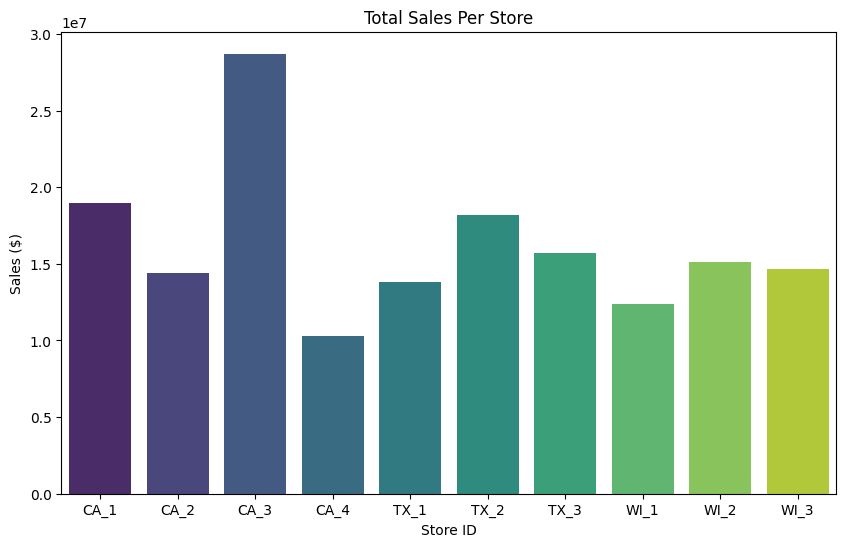

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'store_id' to get total sales per store
sales_by_store = sales.groupby('store_id')['salesUSD'].sum().reset_index()

print(sales_by_store)

# Plotting total sales per store
plt.figure(figsize=(10, 6))
sns.barplot(x='store_id', y='salesUSD', data=sales_by_store, palette='viridis')
plt.title('Total Sales Per Store')
plt.xlabel('Store ID')
plt.ylabel('Sales ($)')
plt.show()

   year     salesUSD
0  2011  21827345.08
1  2012  28926312.11
2  2013  30718326.67
3  2014  31312079.04
4  2015  34271736.39
5  2016  15193429.17


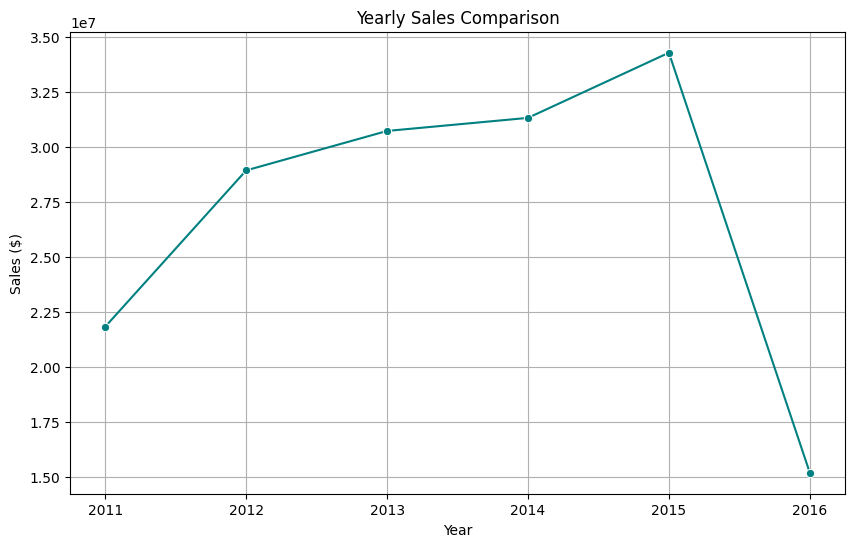

In [23]:
# Extracting year from 'date' column
sales['year'] = pd.to_datetime(sales['date']).dt.year

# Calculating total sales per year
revenue_by_year = sales.groupby('year')['salesUSD'].sum().reset_index()

print(revenue_by_year)

# Plotting sales over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='salesUSD', data=revenue_by_year, marker='o', color='teal')
plt.title('Yearly Sales Comparison')
plt.xlabel('Year')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.show()

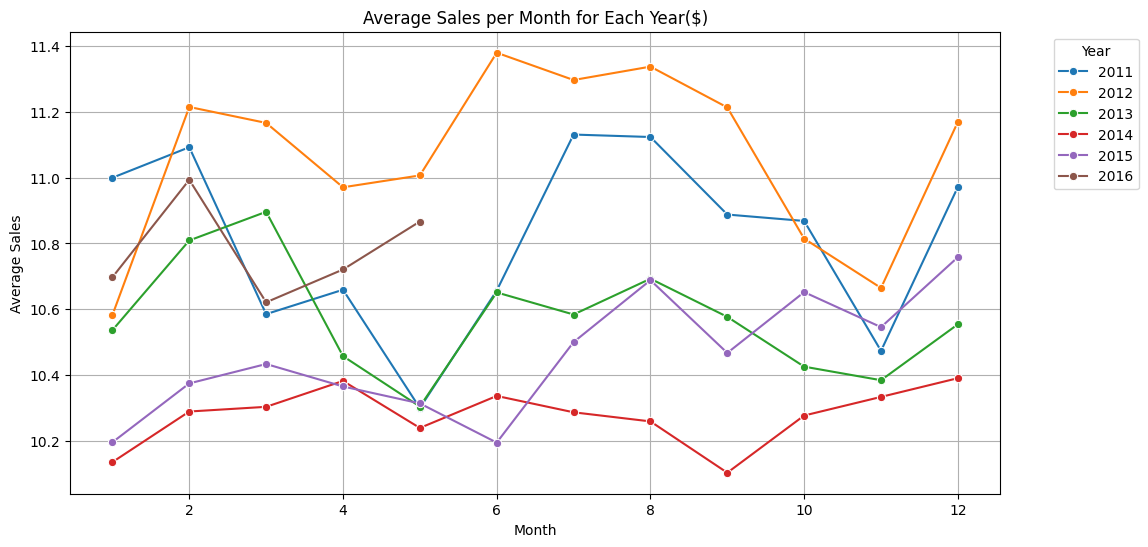

In [41]:
# Extracting month and year
sales['month'] = sales['date'].dt.month

# Group by month and year to get average sales
monthly_sales = sales.groupby(['year', 'month']).agg({'salesUSD': 'mean'}).reset_index()

# Plot average sales per month for each year
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month', y='salesUSD', hue='year', marker='o', palette='tab10')
plt.title('Average Sales per Month for Each Year($)')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.grid()
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

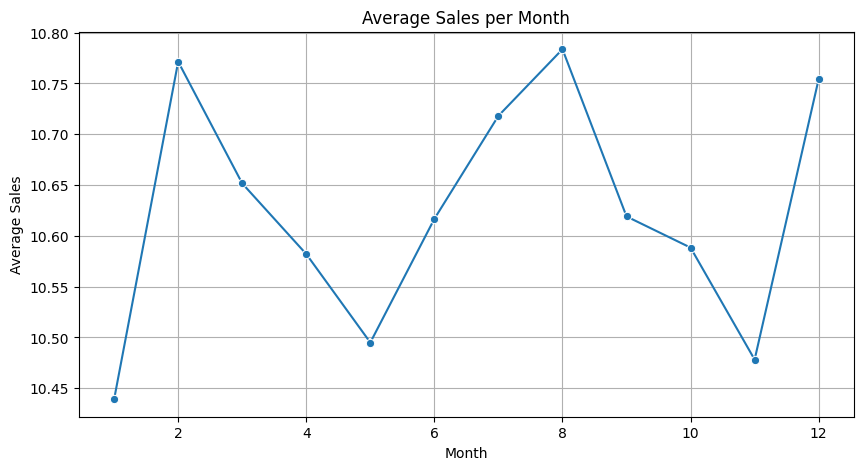

In [42]:
monthly_sales = sales.groupby('month').agg({'salesUSD': 'mean'}).reset_index()

# Plot monthly sales pattern
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='month', y='salesUSD', marker='o')
plt.title('Average Sales per Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.grid()
plt.show()

In [26]:
sales['month'] = sales['date'].dt.month
sales['day_of_week'] = sales['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
sales['year'] = sales['date'].dt.year

In [44]:
sales['year_month'] = sales['date'].dt.to_period('M')
# Calculating average sales per store per month
monthly_sales = sales.groupby(['store_id', 'year_month']).agg({'salesUSD': 'mean'}).reset_index()

# Rename the sales column for clarity
monthly_sales = monthly_sales.rename(columns={'salesUSD': 'avg_sales_per_monthUSD'})
monthly_sales

C:\Users\estef\AppData\Local\Temp\ipykernel_19724\117039789.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,store_id,year_month,avg_sales_per_monthUSD
0,CA_1,2011-01,12.160976
1,CA_1,2011-02,11.663659
2,CA_1,2011-03,11.192948
3,CA_1,2011-04,11.757622
4,CA_1,2011-05,11.338341
...,...,...,...
645,WI_3,2016-01,9.847841
646,WI_3,2016-02,10.203010
647,WI_3,2016-03,9.823519
648,WI_3,2016-04,9.805352


C:\Users\estef\AppData\Local\Temp\ipykernel_19724\3049823849.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



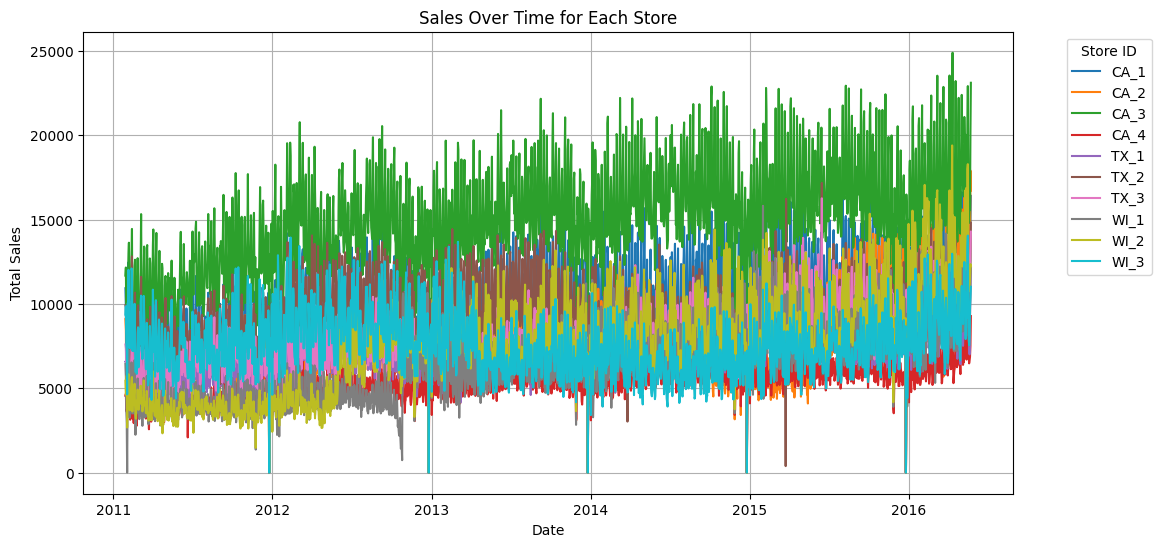

In [45]:
# Aggregate sales per store per day
store_sales = sales.groupby(['store_id', 'date']).agg({'salesUSD': 'sum'}).reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=store_sales, x='date', y='salesUSD', hue='store_id')
plt.title('Sales Over Time for Each Store')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Store ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


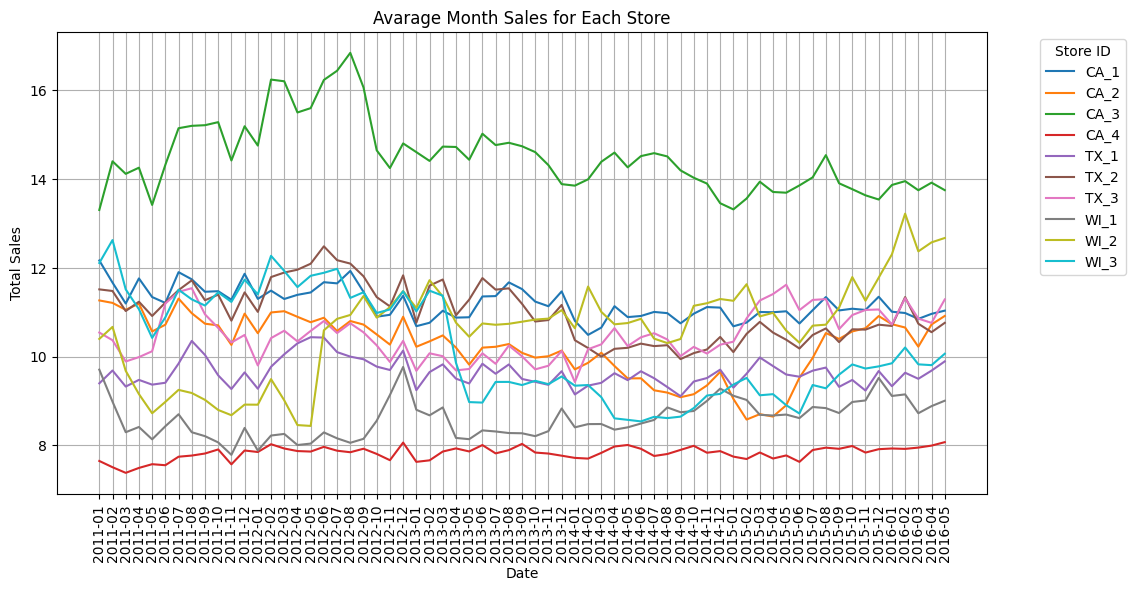

In [46]:
plt.figure(figsize=(12, 6))
# Convert 'year_month' to string before plotting
sns.lineplot(data=monthly_sales, x=monthly_sales['year_month'].astype(str), y='avg_sales_per_monthUSD', hue='store_id')
plt.title('Avarage Month Sales for Each Store')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Total Sales')
plt.legend(title='Store ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

C:\Users\estef\AppData\Local\Temp\ipykernel_19724\3532068285.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




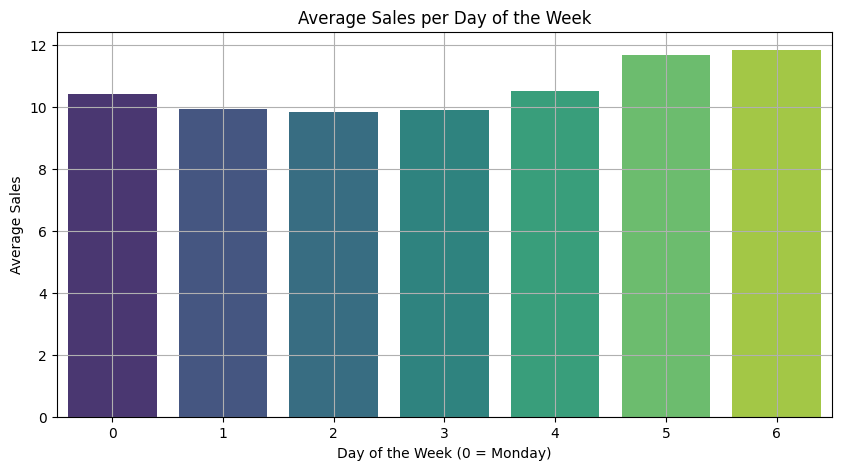

In [47]:
weekly_sales = sales.groupby('day_of_week').agg({'salesUSD': 'mean'}).reset_index()

# Plot weekly sales pattern
plt.figure(figsize=(10, 5))
sns.barplot(data=weekly_sales, x='day_of_week', y='salesUSD', palette='viridis')
plt.title('Average Sales per Day of the Week')
plt.xlabel('Day of the Week (0 = Monday)')
plt.ylabel('Average Sales')
plt.grid()
plt.show()

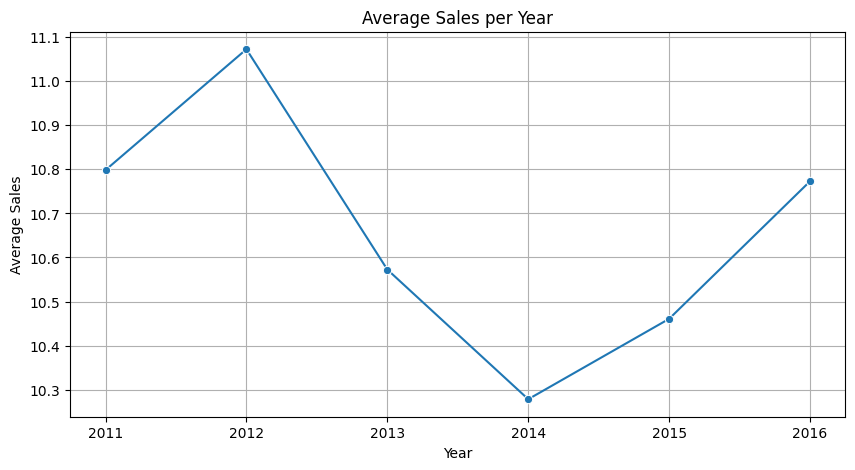

In [48]:
yearly_sales = sales.groupby('year').agg({'salesUSD': 'mean'}).reset_index()

# Plot yearly sales pattern
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_sales, x='year', y='salesUSD', marker='o')
plt.title('Average Sales per Year')
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.grid()
plt.show()

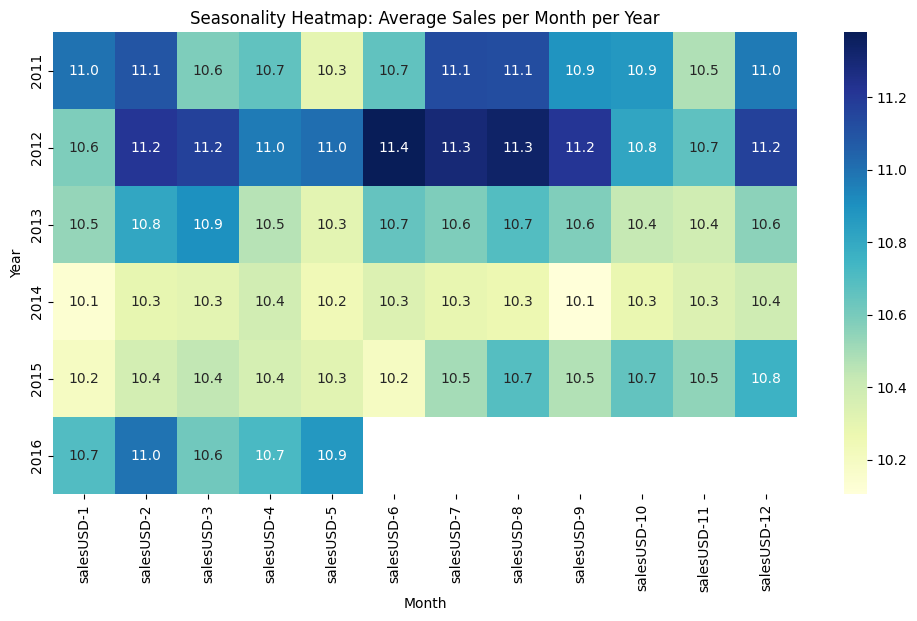

In [49]:
# Aggregate sales by month and year
monthly_yearly_sales = sales.groupby(['year', 'month']).agg({'salesUSD': 'mean'}).unstack()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_yearly_sales, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Seasonality Heatmap: Average Sales per Month per Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

C:\Users\estef\AppData\Local\Temp\ipykernel_19724\1082280563.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\estef\AppData\Local\Temp\ipykernel_19724\1082280563.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




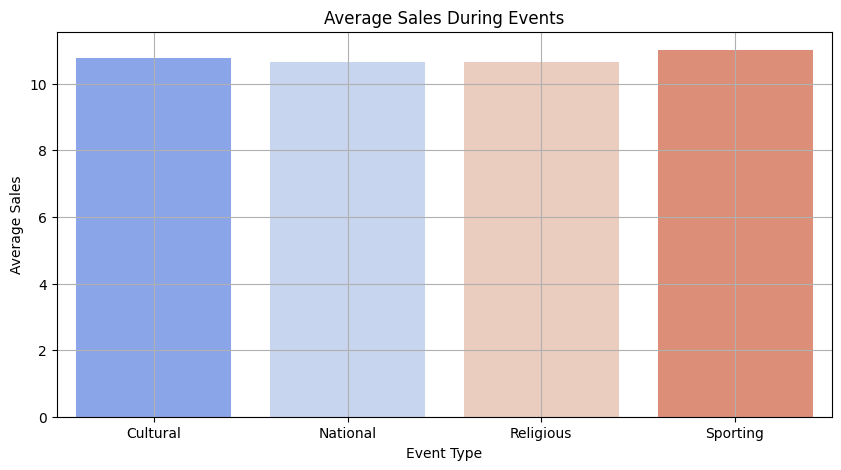

In [50]:


# Aggregate sales by event type
event_sales = sales.groupby(['event_type']).agg({'salesUSD': 'mean'}).reset_index()

# Plot sales by event type
plt.figure(figsize=(10, 5))
sns.barplot(data=event_sales, x='event_type', y='salesUSD', palette='coolwarm')
plt.title('Average Sales During Events')
plt.xlabel('Event Type')
plt.ylabel('Average Sales')
plt.grid()
plt.show()


In [34]:
average_prices = prices.groupby(['store_id', 'item_id'])['sell_price'].mean().reset_index()
px.box(average_prices, x='store_id', y='sell_price', color='store_id',
             title='Avarage Price Distribution per Store',
             labels={'sell_price': 'Average Price', 'store_id': 'Store ID'}).show()


C:\Users\estef\AppData\Local\Temp\ipykernel_19724\1493827853.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_prices = prices.groupby(['store_id', 'item_id'])['sell_price'].mean().reset_index()


In [35]:
#Creating df that contains the first and last week registered
last_first_week = prices.merge(prices.groupby(['store_id', 'item_id']).agg(
    first_week=('wm_yr_wk', 'min'),
    last_week=('wm_yr_wk', 'max')
).reset_index(), on=['store_id', 'item_id'])

#Creating a df that shows the first and last price registered
price_change = last_first_week.loc[last_first_week['wm_yr_wk'] == last_first_week['first_week']].rename(columns={'sell_price': 'start_price'})[['store_id', 'item_id', 'start_price']]
price_change = price_change.merge(last_first_week.loc[last_first_week['wm_yr_wk'] == last_first_week['last_week']].rename(columns={'sell_price': 'final_price'})[['store_id', 'item_id', 'final_price']], on=['store_id', 'item_id'])
price_change


C:\Users\estef\AppData\Local\Temp\ipykernel_19724\456931656.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,store_id,item_id,start_price,final_price
0,CA_1,FOODS_1_014,0.98,0.98
1,CA_2,FOODS_1_014,0.98,0.98
2,CA_3,FOODS_1_014,0.98,0.98
3,CA_4,FOODS_1_014,0.98,0.98
4,TX_1,FOODS_1_014,0.98,0.98
...,...,...,...,...
30485,WI_3,FOODS_3_820,1.57,1.98
30486,WI_3,FOODS_3_822,3.98,3.98
30487,WI_3,FOODS_3_823,2.50,2.98
30488,WI_3,FOODS_3_824,2.47,2.48


In [36]:
#Verifying if results are correct for each item (modify item id and store id for accurate results)
prices.loc[(prices['item_id'] == 'HOBBIES_1_001') & (prices['store_id'] == 'CA_1')].sort_values(by='wm_yr_wk')

,item_id,store_id,wm_yr_wk,sell_price
8247,HOBBIES_1_001,CA_1,11325,9.58
8248,HOBBIES_1_001,CA_1,11326,9.58
8249,HOBBIES_1_001,CA_1,11327,8.26
8250,HOBBIES_1_001,CA_1,11328,8.26
8251,HOBBIES_1_001,CA_1,11329,8.26
...,...,...,...,...
8396,HOBBIES_1_001,CA_1,11617,8.38
8397,HOBBIES_1_001,CA_1,11618,8.38
8398,HOBBIES_1_001,CA_1,11619,8.38
8399,HOBBIES_1_001,CA_1,11620,8.38


In [37]:
price_change['price_diff'] = price_change['final_price'] - price_change['start_price']
price_change

,store_id,item_id,start_price,final_price,price_diff
0,CA_1,FOODS_1_014,0.98,0.98,0.00
1,CA_2,FOODS_1_014,0.98,0.98,0.00
2,CA_3,FOODS_1_014,0.98,0.98,0.00
3,CA_4,FOODS_1_014,0.98,0.98,0.00
4,TX_1,FOODS_1_014,0.98,0.98,0.00
...,...,...,...,...,...
30485,WI_3,FOODS_3_820,1.57,1.98,0.41
30486,WI_3,FOODS_3_822,3.98,3.98,0.00
30487,WI_3,FOODS_3_823,2.50,2.98,0.48
30488,WI_3,FOODS_3_824,2.47,2.48,0.01


In [38]:
store_increase = price_change.groupby('store_id')['price_diff'].mean().reset_index()
fig = px.bar(store_increase, x='store_id', y='price_diff',
             title='Total Price Increase per Store',
             labels={'price_increase': 'Avarage Price Increase', 'store_id': 'Store ID'},
             color='price_diff', color_continuous_scale='Reds')
fig.show()

C:\Users\estef\AppData\Local\Temp\ipykernel_19724\690636908.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [39]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1969 non-null   datetime64[ns]
 1   wm_yr_wk    1969 non-null   int64         
 2   weekday     1969 non-null   object        
 3   wday        1969 non-null   int64         
 4   month       1969 non-null   int64         
 5   year        1969 non-null   int64         
 6   d           1969 non-null   object        
 7   event_name  162 non-null    category      
 8   event_type  162 non-null    category      
 9   snap_CA     1969 non-null   category      
 10  snap_TX     1969 non-null   category      
 11  snap_WI     1969 non-null   category      
dtypes: category(5), datetime64[ns](1), int64(4), object(2)
memory usage: 119.3+ KB
